## Lab 5 (Optional)
In this lab, you are expected to study the provided code below which uses a dummy dataset to create three classifiers using Decision Trees, Bagged-Decision Trees, and Random Forests. 

In Bagged-Decision Trees and Random Forest models, the parameter n_estimators indicates the number of decision trees. Also, in Random Forests, parameter max_features is used to randomize the features. 

Manipulate the above-mentioned parameters and find out which value would prevent overfitting the model? Also, using the last plot, based on your manpulation, which feature(s) show to be more important? Do a research to find out how feature importance is calculated in the Random Forest model and what does it indicate? Explain the role of feature importance in Ranforest Models? (Random Forest)

---

Feature 3 seems to be most important (.4).

Feature importance in Random Forest models is calculated in 2 ways: Mean Decrease Impurity (MDI) or Gini Importance is a calculation of how different feature branches affect the weighted impurity across all trees, with higher values indicating more important features. Permutation Importance is a measurement on how much the model's performance decreases when feature values are randomly shuffled - this is computationally expensive but often more fitting than MDI.

Feature importance in Random Forest models measures how much each input variable contributes to the model's predictions by calculating its importance in two primary ways: by measuring how much each feature helps make decisions within the decision trees, and by testing how model accuracy changes when a feature's values are randomly shuffled.

In [28]:
import pandas as pd

# Load the dataset
df = pd.read_csv('small_dataset.csv')

#Print the number of input features
n_features = df.shape[1] - 1

print(n_features)
# Display the first few rows
print(df.head())

3
   Feature1  Feature2  Feature3  Target
0       2.5       3.1       1.2       0
1       1.0       2.3       3.3       1
2       3.3       4.4       2.1       0
3       1.5       2.8       3.6       1
4       3.0       3.5       1.8       0


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Split the data into features and target
X = df.drop('Target', axis=1)
y = df['Target']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a single decision tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Predict and evaluate
y_pred_tree = tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Single Decision Tree Accuracy: {accuracy_tree:.2f}')

Single Decision Tree Accuracy: 0.67


[Text(0.5, 0.75, 'x[1] <= 3.0\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.625, 0.5, '  False')]

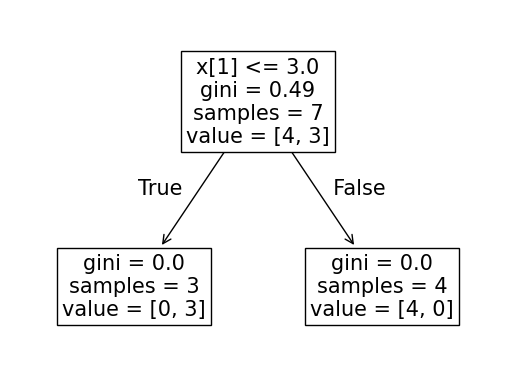

In [37]:
from sklearn.tree import plot_tree

plot_tree(tree, fontsize = 15)

In [39]:
from sklearn.ensemble import BaggingClassifier

# Create a bagged decision tree model
bagged_tree = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagged_tree.fit(X_train, y_train)

# Predict and evaluate
y_pred_bagged = bagged_tree.predict(X_test)
accuracy_bagged = accuracy_score(y_test, y_pred_bagged)
print(f'Bagged Decision Trees Accuracy: {accuracy_bagged:.2f}')


Bagged Decision Trees Accuracy: 0.67


In [20]:
from sklearn.ensemble import RandomForestClassifier
import math

# Create a Random Forest model
random_forest = RandomForestClassifier(max_features =math.ceil(math.sqrt(n_features)) , n_estimators=10, random_state=42)
random_forest.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')


Random Forest Accuracy: 0.67


In [23]:
print("Comparison of Model Accuracies:")
print(f'Single Decision Tree Accuracy: {accuracy_tree:.2f}')
print(f'Bagged Decision Trees Accuracy: {accuracy_bagged:.2f}')
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')

# Discuss the results


Comparison of Model Accuracies:
Single Decision Tree Accuracy: 0.67
Bagged Decision Trees Accuracy: 0.67
Random Forest Accuracy: 0.67


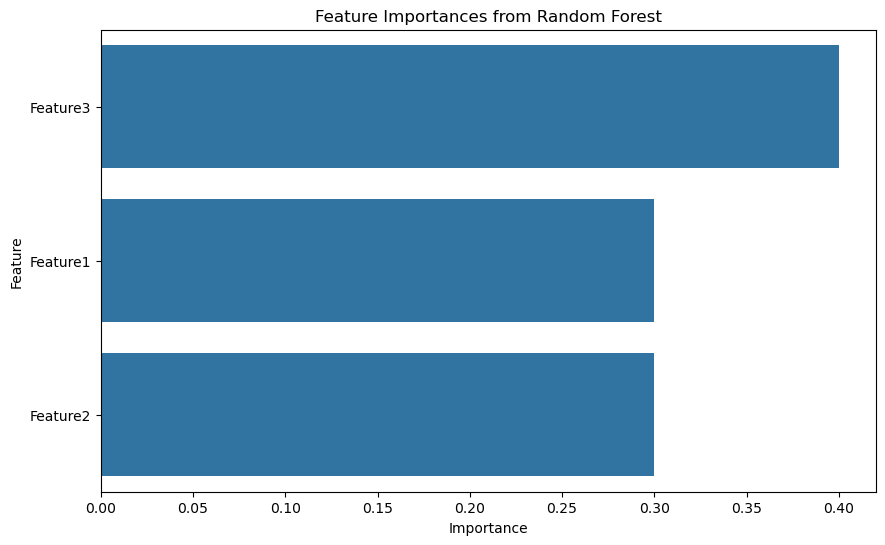

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importances from the Random Forest model
feature_importances = random_forest.feature_importances_
features = X.columns

# Create a DataFrame for plotting  
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from Random Forest')
plt.show()
